In [24]:
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn

In [25]:
obesity = pd.read_csv("ObesityData_Control.csv")
obesity.shape

(2111, 10)

In [26]:
obesity['Obesity'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Name: Obesity, dtype: int64

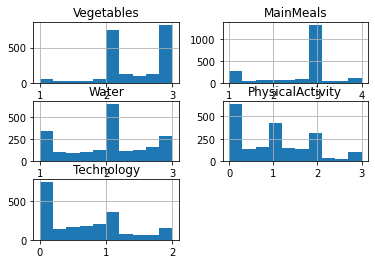

In [27]:
obesity.hist()
pyplot.show()

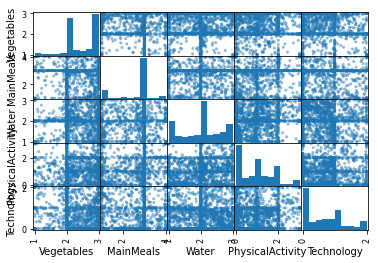

In [28]:
scatter_matrix(obesity)
pyplot.show()

In [29]:
y = obesity.pop('Obesity')

In [30]:
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: Obesity, Length: 2111, dtype: object

In [31]:
y.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [32]:
x = obesity.copy()

In [33]:
x

,HighCaloric,Vegetables,MainMeals,Snacks,Water,Calories,PhysicalActivity,Technology,Alcohol
0,no,2.0,3.0,Sometimes,2.000000,no,0.000000,1.000000,no
1,no,3.0,3.0,Sometimes,3.000000,yes,3.000000,0.000000,Sometimes
2,no,2.0,3.0,Sometimes,2.000000,no,2.000000,1.000000,Frequently
3,no,3.0,3.0,Sometimes,2.000000,no,2.000000,0.000000,Frequently
4,no,2.0,1.0,Sometimes,2.000000,no,0.000000,0.000000,Sometimes
...,...,...,...,...,...,...,...,...,...
2106,yes,3.0,3.0,Sometimes,1.728139,no,1.676269,0.906247,Sometimes
2107,yes,3.0,3.0,Sometimes,2.005130,no,1.341390,0.599270,Sometimes
2108,yes,3.0,3.0,Sometimes,2.054193,no,1.414209,0.646288,Sometimes
2109,yes,3.0,3.0,Sometimes,2.852339,no,1.139107,0.586035,Sometimes


In [34]:
obesity['HighCaloric'] = obesity['HighCaloric'].map({'yes': 1, 'no': 0})

In [35]:
obesity['Snacks'].value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: Snacks, dtype: int64

In [36]:
obesity['Snacks'] = obesity['Snacks'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

In [37]:
obesity['Calories'] = obesity['Calories'].map({'yes': 0, 'no': 1})

In [38]:
obesity['Alcohol'].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: Alcohol, dtype: int64

In [39]:
obesity['Alcohol'] = obesity['Alcohol'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

In [40]:
x = obesity.copy()

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1688, 9), (423, 9), (1688,), (423,))

In [42]:
x_train

,HighCaloric,Vegetables,MainMeals,Snacks,Water,Calories,PhysicalActivity,Technology,Alcohol
685,1,2.004146,3.443456,2,2.020764,1,1.078719,1.267290,0
1825,1,3.000000,3.000000,1,2.714949,1,1.999773,0.813784,1
246,1,3.000000,3.000000,1,3.000000,1,0.000000,1.000000,1
1374,1,3.000000,3.000000,1,2.480277,1,1.796779,1.596562,1
387,1,2.000000,3.000000,2,1.000000,1,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...
1451,1,2.000000,3.000000,1,2.290368,1,0.001086,0.544128,1
1883,1,3.000000,3.000000,1,2.559750,1,0.000000,0.237307,1
2048,1,3.000000,3.000000,1,1.144539,1,0.922014,0.899673,1
1352,1,2.020785,1.169173,1,1.972551,1,1.903338,0.000000,1


In [43]:
x_test

,HighCaloric,Vegetables,MainMeals,Snacks,Water,Calories,PhysicalActivity,Technology,Alcohol
64,1,2.000000,3.000000,2,1.000000,1,1.000000,1.000000,0
961,1,2.000000,1.030416,1,2.118716,1,0.529259,0.000000,0
1711,1,2.320201,3.000000,1,2.164784,1,0.000000,1.465479,1
1678,1,2.585942,3.000000,1,2.302506,1,0.597863,0.111925,1
1311,1,2.467002,1.851088,1,2.104054,1,1.991565,0.000000,1
...,...,...,...,...,...,...,...,...,...
712,0,2.910345,3.000000,2,1.000000,0,1.461005,0.000000,1
666,1,1.053534,3.378859,1,1.000000,1,1.853425,0.861809,1
423,1,2.000000,3.000000,1,1.000000,1,1.000000,1.000000,1
1959,1,3.000000,3.000000,1,2.436097,1,0.129178,0.683736,1


In [44]:
y_train

685     Insufficient_Weight
1825       Obesity_Type_III
246           Normal_Weight
1374         Obesity_Type_I
387          Obesity_Type_I
               ...         
1451         Obesity_Type_I
1883       Obesity_Type_III
2048       Obesity_Type_III
1352         Obesity_Type_I
810      Overweight_Level_I
Name: Obesity, Length: 1688, dtype: object

In [45]:
y_test

64            Normal_Weight
961      Overweight_Level_I
1711        Obesity_Type_II
1678        Obesity_Type_II
1311         Obesity_Type_I
               ...         
712     Insufficient_Weight
666     Insufficient_Weight
423     Overweight_Level_II
1959       Obesity_Type_III
125      Overweight_Level_I
Name: Obesity, Length: 423, dtype: object

In [46]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [47]:
predictions = model.predict(x_test)

In [48]:
predictions

array(['Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_II', 'Obesity_Type_I', 'Obesity_Type_III',
       'Obesity_Type_III', 'Obesity_Type_I', 'Overweight_Level_II',
       'Normal_Weight', 'Obesity_Type_II', 'Normal_Weight',
       'Normal_Weight', 'Normal_Weight', 'Normal_Weight',
       'Obesity_Type_III', 'Obesity_Type_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Overweight_Level_II', 'Overweight_Level_II',
       'Insufficient_Weight', 'Overweight_Level_II', 'Obesity_Type_I',
       'Overweight_Level_II', 'Obesity_Type_III', 'Obesity_Type_I',
       'Obesity_Type_I', 'Overweight_Level_I', 'Normal_Weight',
       'Normal_Weight', 'Overweight_Level_II', 'Obesity_Type_II',
       'Normal_Weight', 'Obesity_Type_III', 'Overweight_Level_II',
       'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_I',
       'Insufficient_Weight', 'Insufficient_Weight',
       'Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_I',
       'Obesity_Type_I', 

In [49]:
accuracy_score(y_test, predictions)

0.735224586288416

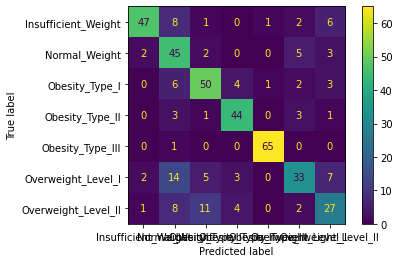

In [50]:
sklearn.metrics.plot_confusion_matrix(model, x_test, y_test)

In [51]:
predictions_train = model.predict(x_train)

In [52]:
importances = model.feature_importances_

In [53]:
sorted_indices = np.argsort(importances)[::-1]

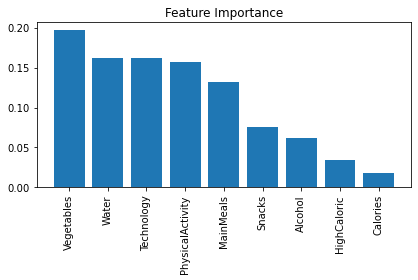

In [54]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()